# Project Discription
The aim of this project is to extract titles and content of a news website in order to find common words used in the news. The name of website is, https://www.foreigner.fi. We are extracting only National news from this website (https://www.foreigner.fi/blog/section/national). For this project, we have taken first 30 pages from the website.

This is a group work by Pawan Singh, Shree Sapkota and Swostik Shrestha.

# Importing libraries

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from collections import Counter
from itertools import chain
import re
from datetime import datetime

import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

# To filter certain words
import nltk
from nltk.corpus import stopwords
# There are various stopwords in different languages. 
#We need to download once to use them. 
#nltk.download('stopwords')

# Data collection using requests
* " **Requests** is an Apache2 Licensed HTTP library, that allows to send HTTP/1.1 requests using Python.
* To play with web, Python Requests is must. Whether it be hitting APIs, downloading entire facebook pages, and much more cool stuff, one will have to make a request to the URL.
* Requests play a major role is dealing with REST APIs, and Web Scrapping." (Source - geeksforgeeks.org)

* "**Beautiful Soup** is a library that makes it easy to scrape information from web pages." Source- pypi.org

In [2]:
# This is the url from where we start extracting data
url = "https://www.foreigner.fi/blog/section/national"

In [3]:
req = requests.get(url)

Here, 'req' is the response object and we can get all the information from this object.

In [4]:
req.status_code

200

In [5]:
soup = BeautifulSoup(req.content, features='html.parser')

Now we will find all the links existed in the link in the given url.

In [6]:
links_=[]
for i in soup.find_all('h2',{'class':'title'}):
    for k in i.find_all('a'):
        links_.append(k['href'])


In [7]:
links_[0]

'/articulo/national/police-to-conduct-24-hour-speed-control-marathon-on-thursday-26/20210825184827013550.html'

If we check the first element in our list, 'link', the address is still not complete. We need to add 'https:// www .foreigner. fi' to all links. Lets do it as follows.

In [8]:
links=[]
for i in links_:
    a = 'https://www.foreigner.fi' + i
    links.append(a)

In [9]:

links[0]

'https://www.foreigner.fi/articulo/national/police-to-conduct-24-hour-speed-control-marathon-on-thursday-26/20210825184827013550.html'

Now, we can check if we get successfull response when we send a get request to these links as follows.

In [10]:
requests.get(links[0])

<Response [200]>

So, from first link we get a successful response (200)

# Finding all links from different pages
We will use 30 pages (each page has 20 links of news) to extract all the links (20*30=600 links) and then extract data from each links below.

In [33]:
page_url = 'https://www.foreigner.fi/blog/section/national'
links_=[]
for i in range(30):
    reqst = requests.get(page_url) 
    soup_ = BeautifulSoup(reqst.content, features='html.parser')
# Finding news headlines (titles) from 1st page. 
    for i in soup_.find_all('h2',{'class':'title'}):
        for k in i.find_all('a'):
            links_.append(k['href'])
# now, we will find link of the next page 
    next_ = soup_.find('li',{'class':'next'}).find('a')['href']
# Now we will go the the next page.
    page_url = 'https://www.foreigner.fi' + next_

There are 20 news headlines (20 links) in each page. So, in 30 pages, we have.. 30*20 = 600 news headlines (links)

In [79]:
print(f'Total number of links : {len(links_)}')

Total number of links : 600


Now, from each link we will extract the data. The data includes, news headline, date of publication and the contents of the news.

In [34]:
news_headlines = []
dates_ = []
all_words = []
for i in links_:
    #print(i)
    response_ = requests.get('https://www.foreigner.fi'+i)
    soup_ = BeautifulSoup(response_.content)
    # Extracting headlines
    news_headlines.append(soup_.find('title').text)
    # Extracting dates
    dates_.append(soup_.find('span',{'class':'content-time'})
                  .text.strip())
    # Extracting all words
    
    
    words = soup_.find('div', {'class':'body national'}).text
    all_words.append(' '.join(words.split()))

Now we have three list as shown above and now we will covert these lists into pandas dataframe and do the data processing and analysis.

# Converting into pandas dataframe

In [35]:
df = pd.DataFrame({'Dates': dates_, 
                   'Titles':news_headlines,
                   'Content':all_words})

In [36]:
df.head()

,Dates,Titles,Content
0,"August 25, 2021 at 6:50 PM",Police to conduct 24-hour speed control marath...,Finnish police will carry out 24-hour automati...
1,"August 25, 2021 at 9:44 AM",Government raises number of Afghans to evacuat...,The Finnish coalition government chaired by Pr...
2,"August 24, 2021 at 4:11 PM",Finland has evacuated more than 200 people fro...,Finland has already facilitated the evacuation...
3,"August 23, 2021 at 7:26 PM",Police to monitor drivers' behaviour near cros...,Following the control campaign conducted two w...
4,"August 23, 2021 at 5:40 PM",Finland to open an embassy in Dakar,The Ministry for Foreign Affairs is making pre...


We will also count the number of words in 'Titles' and 'Content' and add them in our dataframe as show as below.

In [37]:
df['word_count_title'] = [len(i.split()) for i in df['Titles']]
#Method 2
#df['word_count_title'] = df['Title'].map(lambda x:len(x.split()))

In [38]:
df['word_count_Content'] = [len(i.split()) for i in df['Content']]

In [39]:
df.head()

,Dates,Titles,Content,word_count_title,word_count_Content
0,"August 25, 2021 at 6:50 PM",Police to conduct 24-hour speed control marath...,Finnish police will carry out 24-hour automati...,10,259
1,"August 25, 2021 at 9:44 AM",Government raises number of Afghans to evacuat...,The Finnish coalition government chaired by Pr...,11,240
2,"August 24, 2021 at 4:11 PM",Finland has evacuated more than 200 people fro...,Finland has already facilitated the evacuation...,9,439
3,"August 23, 2021 at 7:26 PM",Police to monitor drivers' behaviour near cros...,Following the control campaign conducted two w...,9,355
4,"August 23, 2021 at 5:40 PM",Finland to open an embassy in Dakar,The Ministry for Foreign Affairs is making pre...,7,298


From the above dataframe we can see, Dates, Titles and its contents. Also, we can see how many words a title have and how many words the contents have

## Saving a file to local machine
We will save the dataframe to our local machine so that we dont have to run all the above codes again and again.

In [40]:
df.to_pickle("foreigner_news.pkl")

In [41]:
df = pd.read_pickle('foreigner_news.pkl')

Reading a pickle file

When we save a dataframe to a pickle file in local computer we can read it using pd.read_pickle()

In [42]:
df

,Dates,Titles,Content,word_count_title,word_count_Content
0,"August 25, 2021 at 6:50 PM",Police to conduct 24-hour speed control marath...,Finnish police will carry out 24-hour automati...,10,259
1,"August 25, 2021 at 9:44 AM",Government raises number of Afghans to evacuat...,The Finnish coalition government chaired by Pr...,11,240
2,"August 24, 2021 at 4:11 PM",Finland has evacuated more than 200 people fro...,Finland has already facilitated the evacuation...,9,439
3,"August 23, 2021 at 7:26 PM",Police to monitor drivers' behaviour near cros...,Following the control campaign conducted two w...,9,355
4,"August 23, 2021 at 5:40 PM",Finland to open an embassy in Dakar,The Ministry for Foreign Affairs is making pre...,7,298
...,...,...,...,...,...
595,"October 4, 2019 at 12:39 PM",Suspect of Kuopio sword attack jailed by North...,"Joel Otto Aukusti Marin, the student born in 1...",11,303
596,"October 3, 2019 at 4:28 PM",Rinne to meet representatives of the attacked ...,Prime Minister Antti Rinne will visit Kuopio o...,11,92
597,"October 3, 2019 at 1:50 PM",President Niinistö met Donald Trump in the Whi...,President Sauli Niinistö made this week an off...,9,185
598,"October 3, 2019 at 12:28 PM",The victim of the attack at Kuopio College is ...,The victim of the attack perpetrated on Tuesda...,13,416


# Data Cleaning

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Dates               600 non-null    object
 1   Titles              600 non-null    object
 2   Content             600 non-null    object
 3   word_count_title    600 non-null    int64 
 4   word_count_Content  600 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 23.6+ KB


From the information we can see taht there are 600 rows of data. First we convert 'Dates' column in Datatime format. We will convert all the text in 'Title' and in 'Contents' in lowercase, so that its easy to count the words. We will also remove unnessary words in the text as defined in stopwords below.

In [44]:
df['Dates'] = pd.to_datetime(df['Dates'])

In [45]:
df.head(3)

,Dates,Titles,Content,word_count_title,word_count_Content
0,2021-08-25 18:50:00,Police to conduct 24-hour speed control marath...,Finnish police will carry out 24-hour automati...,10,259
1,2021-08-25 09:44:00,Government raises number of Afghans to evacuat...,The Finnish coalition government chaired by Pr...,11,240
2,2021-08-24 16:11:00,Finland has evacuated more than 200 people fro...,Finland has already facilitated the evacuation...,9,439


In [46]:
df.set_index('Dates', inplace=True)

In [47]:
df.head(3)

,Titles,Content,word_count_title,word_count_Content
Dates,,,,
2021-08-25 18:50:00,Police to conduct 24-hour speed control marath...,Finnish police will carry out 24-hour automati...,10,259
2021-08-25 09:44:00,Government raises number of Afghans to evacuat...,The Finnish coalition government chaired by Pr...,11,240
2021-08-24 16:11:00,Finland has evacuated more than 200 people fro...,Finland has already facilitated the evacuation...,9,439


In [48]:
df['Titles'] = df['Titles'].str.lower()
df['Content'] = df['Content'].str.lower()

Stop words are commonly used words like 'for', 'to', 'on' etc. We will be removing all these stop words from the titles and contents.

In [73]:
stop_words = stopwords.words('english')
print(stop_words[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [74]:
print(len(stop_words))

179


In this stop_words, some of the words which we do not want to include in this project are not included. For instance, we would like to remove words like 'also', 'would' which are not in the list of stop_words. Lets add them in the list of stop_words.

In [51]:
stop_words = stop_words + ['also','would', 'according']

In [52]:
len(stop_words)

182

We have 182 stopwords which we will remove from our 'Titles' and 'Content' column as we are not interested in these stop words.

# Data analysis

In [76]:
df.head(3)

,Titles,Content,word_count_title,word_count_Content
Dates,,,,
2021-08-25 18:50:00,police to conduct 24-hour speed control marath...,finnish police will carry out 24-hour automati...,10,259
2021-08-25 09:44:00,government raises number of afghans to evacuat...,the finnish coalition government chaired by pr...,11,240
2021-08-24 16:11:00,finland has evacuated more than 200 people fro...,finland has already facilitated the evacuation...,9,439


In [77]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 600 entries, 2021-08-25 18:50:00 to 2019-10-02 13:29:00
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Titles              600 non-null    object
 1   Content             600 non-null    object
 2   word_count_title    600 non-null    int64 
 3   word_count_Content  600 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 23.4+ KB
None


## Average, Maximum and Mininum words in News Articles

In [55]:
print(f"The longest news article consists of : {df['word_count_Content'].max()} words")
print(f"The average news article consists of : {round(df['word_count_Content'].mean(),2)} words")
print(f"The shortest news article consists of : {df['word_count_Content'].min()} words")



The longest news article consists of : 2906 words
The average news article consists of : 309.7 words
The shortest news article consists of : 52 words


## Average, Maximum and Mininum words in News Title

In [56]:
print(f"The longest news title consists of : {df['word_count_title'].max()} words")
print(f"The average news title consists of : {round(df['word_count_title'].mean(),2)} words")
print(f"The shortest news title consists of : {df['word_count_title'].min()} words")

The longest news title consists of : 15 words
The average news title consists of : 9.13 words
The shortest news title consists of : 3 words


## News post by hour

In [57]:
by_hour = df.index.hour.value_counts()

In [58]:
fig1 = px.bar(data_frame=by_hour, text=by_hour, title='News articles posted by Hour')
fig1.update_layout(xaxis_title = 'Hours', yaxis_title = 'Number of articles',showlegend=False, title_x = 0.5, xaxis_tickmode='linear')
fig1.show()

If we see the above figure, we can see that the most number of news are published at 8pm. There are no news publised from 1 am to 4pm.

## News post by Month

In [59]:
byMonth = df.resample('MS').count().Titles
fig2 = px.bar(data_frame=byMonth ,text=byMonth, title='Number of news articles by Month', color=byMonth.index.month)
fig2.update_layout(xaxis_title = 'Months', yaxis_title = 'Number of articles',showlegend=False, title_x = 0.5,)
fig2.show()

From the above figure, we see that Month of June 2020 (44 news) has the highest frequencies of news. There was only 1 news published in the month of September, 2019.

## Counting number of unique words in titles
We will count the number of unique words in news titles and news content.

In [60]:
all_words = []
for i in df.Titles:
    all_words.append(i.split())

In [61]:
word_counts_titles = list(chain.from_iterable(all_words))
filtered_words_titles = [w for w in word_counts_titles if not w in stop_words]
counts_titles = Counter(filtered_words_titles)
#print(counts_titles)

## Wordcloud plot (news titles)

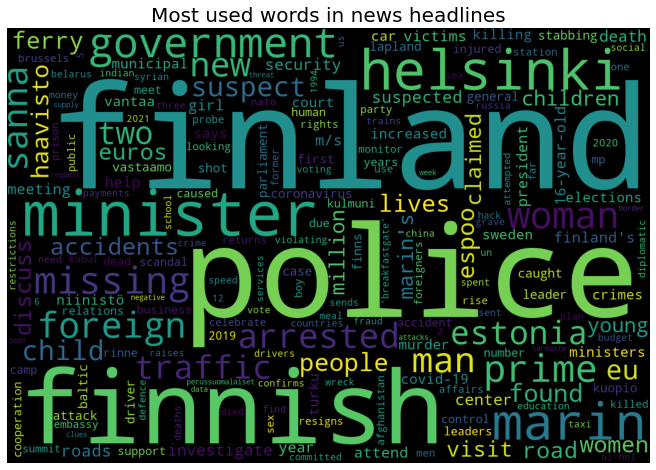

In [81]:
wordcloud_ = WordCloud(width=1210, height=819, repeat=False)
wordcloud_.generate_from_frequencies(dict(counts_titles))
plt.figure(figsize=(14,8))
plt.imshow(wordcloud_,)
plt.axis('off')
plt.title('Most used words in news headlines',fontdict={'fontsize':20});

## Top 10 common words in news headlines

In [84]:
df_titles = pd.DataFrame(counts_titles.items(),columns=['Words','Counts'])
top_10_titles = df_titles.sort_values(ascending=False,by=['Counts']).head(10)
fig = px.bar(data_frame=top_10_titles, x='Words', y='Counts',text='Counts',color='Words',)
fig.update_layout(title='Top 10 common words in news headlines', title_x=0.5,showlegend=False)
fig.show()

We see that in National news, the most used words in titles is 'Finland' and the second most used words is 'police'.

## Counting number of unique words in Content

In [64]:
all_contents = []
for j in df.Content:
    contents = j.split()
    all_contents.append(contents)

In [65]:
new_content = list(chain.from_iterable(all_contents))
print(new_content[60:75])

['work', 'and', 'not', 'much', 'surveillance', 'is', 'necessarily', 'seen', 'at', 'the', 'time.', 'the', 'themed', 'control', 'now']


As we can see in the 'new_content' that there are unnecessary letters in our words. We have words like 'affairs.' with punctuations. Hence, we need to get rid of full stops or commas from our words. For this we will use regex.

In [66]:
all_contents = []
for i in new_content:
    # \W Matches anything other than a letter, digit or underscore and replaces with ''
    all_contents.append(re.sub(pattern = '\W',repl='',string=i))

Let us remove the stop_words as we have done above and count the frequencies using Counter method.

In [67]:
filtered_words_contents = [w for w in all_contents if not w in stop_words]
contents_counts = Counter(filtered_words_contents)
#print(contents_counts)

## Wordcloud plot (News Contents)

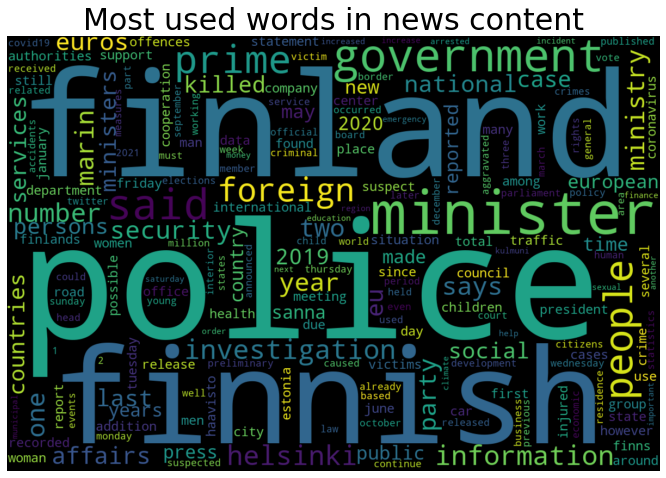

In [83]:
wordcloud = WordCloud(width=1200, height=800, repeat=False)
wordcloud.generate_from_frequencies(dict(contents_counts))
plt.figure(figsize=(14,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most used words in news content',fontdict={'fontsize':30});

## Top 10 used words

In [69]:
df_contents = pd.DataFrame(contents_counts.items(), columns=['Words','Counts'])

In [70]:
top_10_contents = df_contents.sort_values(ascending=False, by='Counts').head(10)
top_10_contents

,Words,Counts
1,police,1332
132,finland,1055
0,finnish,863
122,minister,721
119,government,612
59,said,533
36,people,447
121,prime,437
154,foreign,402
1013,investigation,358


In [71]:
fig_ = px.bar(data_frame=top_10_contents, x='Words',y='Counts',color='Words',text='Counts')
fig_.update_layout(title='Top 10 common words in news content', title_x = 0.5, showlegend=False)
fig_.show()

# Conclusion

- From above figures we can see that most of the news published includes the word police, finland, finnish in both titles and contents. From this, we understand that most of the news are related to police activities.
- Some other more used key words are minister, government, so more news related to finnish politics, as expected could be observed in the newspaper
- From the whole dataset, we can conclude that foreigner.fi tends to be more active at the evening time, as we can see a tall bar at 21 ( 9 - 10 pm) of the day, while, they do not work after midnight until early morning, which is quite understandable.
- In June 2020, highest number of news were published, second highest being october 2019, so we cannot find any trend about news published according to months